In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
pd.options.display.max_rows = 400  # 设置pandas可以显示的行数和列数
pd.options.display.max_columns = None 
import warnings
warnings.filterwarnings("ignore")

# 1.读数据

In [5]:
# date: 日期
# company: 公司代码
# price: 股价
df_stock = pd.read_csv('stock_price.csv', parse_dates=['date'])  # date数据变成时间
df_stock.head(2)

,date,company,price
0,2012-05-18,FB,38.230000
1,2012-05-21,FB,34.029999


In [6]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8398 entries, 0 to 8397
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     8398 non-null   datetime64[ns]
 1   company  8398 non-null   object        
 2   price    8398 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 197.0+ KB


In [12]:
df_stock.value_counts(
)

date        company  price     
2012-05-18  FB       38.230000     1
2020-01-22  FB       221.320007    1
2020-01-21  TWTR     34.090000     1
            SNAP     19.000000     1
            PINS     22.299999     1
                                  ..
2017-06-13  FB       150.679993    1
            ETSY     13.640000     1
2017-06-12  TWTR     17.040001     1
            SNAP     18.200001     1
2022-04-06  TWTR     50.770000     1
Length: 8398, dtype: int64

# 2.  时间序列可视化

## 1. 全时序图

In [13]:
df = df_stock[ df_stock['company']=='FB' ].sort_values('date')


In [14]:
df

,date,company,price
0,2012-05-18,FB,38.230000
1,2012-05-21,FB,34.029999
2,2012-05-22,FB,31.000000
3,2012-05-23,FB,32.000000
4,2012-05-24,FB,33.029999
...,...,...,...
8373,2022-03-31,FB,222.360001
8378,2022-04-01,FB,224.850006
8383,2022-04-04,FB,233.889999
8388,2022-04-05,FB,231.839996


(array([14975., 15340., 15706., 16071., 16436., 16801., 17167., 17532.,
        17897., 18262., 18628., 18993.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

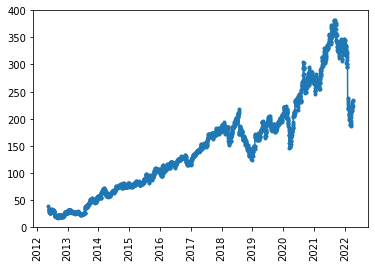

In [18]:
plt.plot( df['date'], df['price'],'.-' )
plt.xticks(rotation=90)

In [17]:
df['date']

0      2012-05-18
1      2012-05-21
2      2012-05-22
3      2012-05-23
4      2012-05-24
          ...    
8373   2022-03-31
8378   2022-04-01
8383   2022-04-04
8388   2022-04-05
8393   2022-04-06
Name: date, Length: 2488, dtype: datetime64[ns]

### 2.1局部时序图

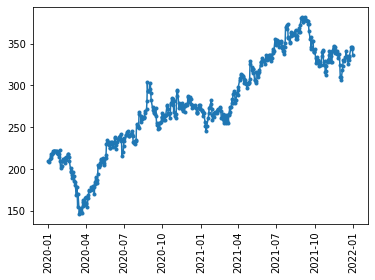

In [19]:
df = df_stock[ (df_stock['company']=='FB') &(df_stock['date']>='2020-01-01') & (df_stock['date']<='2021-12-31')].sort_values('date')
plt.plot( df['date'], df['price'],'.-' )
plt.xticks(rotation=90)
plt.show()

结论：FB的股价总体呈现上市的趋势，局部有波动

#### 例1

In [21]:
# store:门店编号
# dept: 商品部门编号
# week: 每周周一的日期 
# sales: 销售金额
df_sales = pd.read_csv('store_sales.csv', parse_dates=['week']) # week列变成时间
df_sales.head(2)

,store,dept,week,sales
0,1,1,2010-02-01,24924.50
1,1,1,2010-02-08,46039.49


In [22]:
df_sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   store   421570 non-null  int64         
 1   dept    421570 non-null  int64         
 2   week    421570 non-null  datetime64[ns]
 3   sales   421570 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 12.9 MB


In [23]:
### 销售数据， 以1号店的1号部门为例
# 全时序图
df_ = df_sales[ (df_sales['store']==1) & (df_sales['dept']==1)].sort_values('week')   #sort_values按照'week'列 排序从小到大

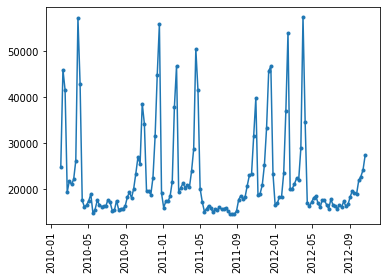

In [27]:
df_
plt.plot( df_['week'], df_['sales'],'.-' )
plt.xticks(rotation=90)
plt.show()

In [26]:
# 部分时序图
df__=df_sales[(df_sales['store']==1)&(df_sales['dept']==1)&(df_sales['week']>='2010-04-05')&(df_sales['week']<='2010-04-12')].sort_values('week')
df__
# plt.plot(df__[week])

,store,dept,week,sales
9,1,1,2010-04-05,42960.91
10,1,1,2010-04-12,17596.96


## 2.3 季节性时序图 (周期性时序图)

In [28]:
# 以1号店1号部门的销售数据为例
df = df_sales[ (df_sales['store']==1) &(df_sales['dept']==1)].sort_values('week')
#计算每周属于哪一年
df['year'] = df['week'].dt.year
#计算每周为一年当中的第几周
df['week_of_year'] = df['week'].dt.weekofyear

In [30]:
df.head()

,store,dept,week,sales,year,week_of_year
0,1,1,2010-02-01,24924.50,2010,5
1,1,1,2010-02-08,46039.49,2010,6
2,1,1,2010-02-15,41595.55,2010,7
3,1,1,2010-02-22,19403.54,2010,8
4,1,1,2010-03-01,21827.90,2010,9


In [33]:
df['year'].unique()

array([2010, 2011, 2012], dtype=int64)

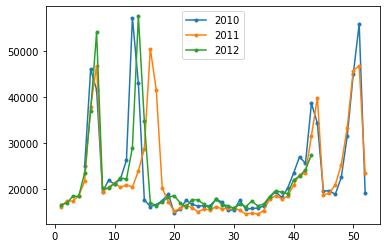

In [32]:
for year in df['year'].unique():
    tmp_df = df[ df['year']==year ]
    plt.plot( tmp_df['week_of_year'], tmp_df['sales'],'.-', label=str(year) )
plt.legend()
plt.show()

结论： 
1. 每年19周-43周（4-10月）是销售的低估
2. 每年44周-次年18周（10-4月）疑似有促销活动
3. 趋势上11年略低于10和12年

### 2.4季节性箱线图(周期性箱线图)

In [34]:
df.head()

,store,dept,week,sales,year,week_of_year
0,1,1,2010-02-01,24924.50,2010,5
1,1,1,2010-02-08,46039.49,2010,6
2,1,1,2010-02-15,41595.55,2010,7
3,1,1,2010-02-22,19403.54,2010,8
4,1,1,2010-03-01,21827.90,2010,9


In [37]:
#将一年当中同一周的数据汇集到一个list
df_boxplot = df.groupby(['week_of_year'])['sales'].agg(list).reset_index()

In [39]:
df_boxplot.head()

,week_of_year,sales
0,1,"[15984.24, 16567.69]"
1,2,"[17359.7, 16894.4]"
2,3,"[17341.47, 18365.1]"
3,4,"[18461.18, 18378.16]"
4,5,"[24924.5, 21665.76, 23510.49]"


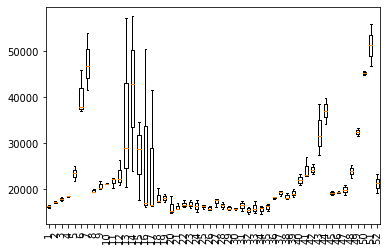

In [40]:
plt.boxplot( df_boxplot['sales'].values, labels=df_boxplot['week_of_year'].values )
plt.xticks(rotation=90)
plt.show()

In [41]:
df.head()

,store,dept,week,sales,year,week_of_year
0,1,1,2010-02-01,24924.50,2010,5
1,1,1,2010-02-08,46039.49,2010,6
2,1,1,2010-02-15,41595.55,2010,7
3,1,1,2010-02-22,19403.54,2010,8
4,1,1,2010-03-01,21827.90,2010,9


In [42]:
# df = df[ (df['week_of_year']>=19) & (df['week_of_year']<=43)]
#将同一年数据汇集到一个list
df_boxplot = df.groupby(['year'])['sales'].agg(list).reset_index()

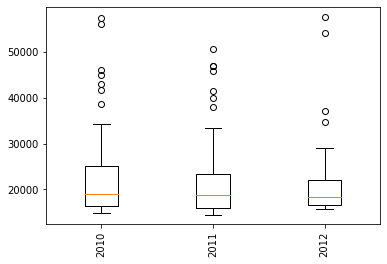

In [45]:
plt.boxplot( df_boxplot['sales'].values, labels=df_boxplot['year'].values )
plt.xticks(rotation=90)
plt.show()

计算周期性

#### ACF

ACF检验 (Auto-Correlation Function, 自相关系数检验） 
$$ r_h = Cor( X_t, X_{t+h} ) , \forall t$$
如果每隔h个单位，ACF值有一个局部高峰，则数据存在以h为单位的周期性

In [46]:
from  statsmodels.graphics.tsaplots import plot_acf

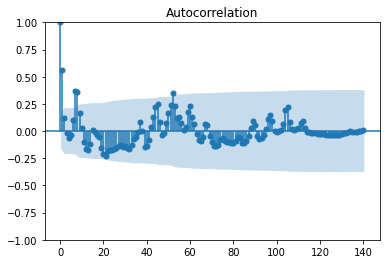

In [47]:
plot_acf(df['sales'], lags=140).show()

结论：数据存在以52周（1年）为单位的周期性

#### STL

In [49]:
from statsmodels.tsa.seasonal import STL

In [50]:
stl = STL(df['sales'].values, period=52) #period: 时间序列的周期
res = stl.fit()


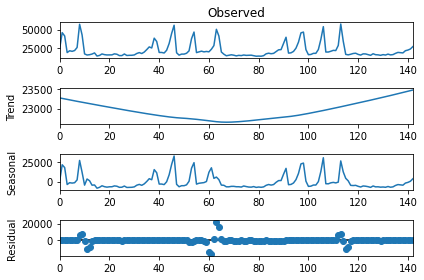

In [51]:
## 分解结果可视化
fig = res.plot()

In [52]:
## 获取结果数字
df['trend'] = res.trend
df['seasonal'] = res.seasonal
df['residule'] = res.resid

# 3.传统统计学算法

## 3.1ETS


In [53]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

以FB的股票数据为例，站在2022-01-01，预测接下来h天的股价

In [58]:
df_stock = pd.read_csv('stock_price.csv', parse_dates=['date'])
df_stock.head(2)
# 构建训练集
# his_date_end = pd.to_datetime('2022-01-01')
data_train = df_stock[ (df_stock['company']=='FB') & (df_stock['date']<='2022-01-01')]

# 把日期变成训练集的index
data_train = data_train[['date','price']].set_index('date')

In [59]:
data_train

,price
date,
2012-05-18,38.230000
2012-05-21,34.029999
2012-05-22,31.000000
2012-05-23,32.000000
2012-05-24,33.029999
...,...
2021-12-27,346.179993
2021-12-28,346.220001
2021-12-29,342.940002


In [60]:
# 构建模型
model = ETSModel( data_train['price'] )
fit = model.fit( )

D:\Anaconda\envs\pytorch1.0_gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [61]:
# 模型拟合结果可视化
data_train['fit_price'] = fit.fittedvalues


In [62]:
data_train.head()

,price,fit_price
date,,
2012-05-18,38.230000,38.004892
2012-05-21,34.029999,38.218297
2012-05-22,31.000000,34.247740
2012-05-23,32.000000,31.168843
2012-05-24,33.029999,31.956790


(array([18635., 18642., 18649., 18659., 18666., 18673., 18680., 18687.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

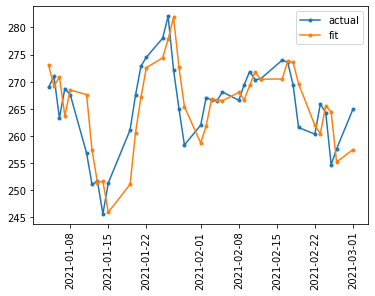

In [63]:
data_plot = data_train[ (data_train.index>='2021-01-01')&(data_train.index<='2021-03-01')]
plt.plot( data_plot['price'], '.-',label='actual' )
plt.plot( data_plot['fit_price'],'.-', label='fit' )
plt.legend()
plt.xticks(rotation=90)

In [64]:
data_train.shape[0]

2422

In [65]:
# 预测未来h天
h = 10
pred_price = fit.get_prediction(start=data_train.shape[0]+1,end = data_train.shape[0]+h)

D:\Anaconda\envs\pytorch1.0_gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
D:\Anaconda\envs\pytorch1.0_gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
D:\Anaconda\envs\pytorch1.0_gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
D:\Anaconda\envs\pytorch1.0_gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


In [66]:
pred_price

In [67]:
pred_price.summary_frame() 

,mean,pi_lower,pi_upper
2423,336.763047,327.461559,346.064535
2424,336.763047,325.472821,348.053273
2425,336.763047,323.785346,349.740748
2426,336.763047,322.293346,351.232748
2427,336.763047,320.941423,352.584670
2428,336.763047,319.696257,353.829836
2429,336.763047,318.535956,354.990137
2430,336.763047,317.445222,356.080871
2431,336.763047,316.412866,357.113228
2432,336.763047,315.430410,358.095684


In [69]:
from  statsmodels.graphics.tsaplots import plot_acf, plot_pacf
df = df_stock[ (df_stock['company']=='FB')].sort_values('date')

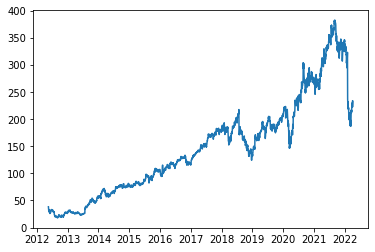

In [70]:
plt.plot( df['date'], df['price'] )

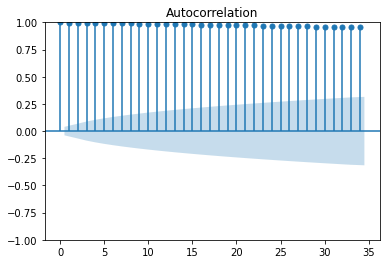

In [71]:
plot_acf(df['price']).show()

自相关性系数大，说明时间序列不平稳

## 3.2 Arima

以FB的股票数据为例，站在2022-01-01，预测接下来h天的股价

In [72]:
data_train = df_stock[ (df_stock['company']=='FB') & (df_stock['date']<='2022-01-01')].sort_values('date')

In [73]:
data_train.head()

,date,company,price
0,2012-05-18,FB,38.230000
1,2012-05-21,FB,34.029999
2,2012-05-22,FB,31.000000
3,2012-05-23,FB,32.000000
4,2012-05-24,FB,33.029999


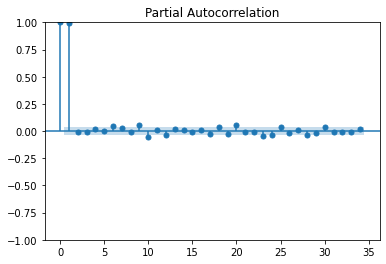

In [74]:
# 通过ACF判断确定I阶数d， 要求是d阶差分是平稳的
d = 1
# AR的阶数p可以通过pacf （偏相关性系数） 图来设定，因为AR各项的系数就代表每两个时间间隔的相关性
# 要求p以后的偏相关性系数比较小
from  statsmodels.graphics.tsaplots import plot_pacf
plot_pacf( data_train['price'] ).show()

In [75]:
p = 1
# 通过差分的ACF判断确定MA阶数q， 要求是q以后的自相关性系数比较小
q = 0 

In [80]:
# 构建Arima模型
from statsmodels.tsa.arima_model import ARIMA  

In [ ]:
## 换一组参数可以让模型的结果更复杂

model = ARIMA(data_train['price'].values, order=(2,2,0))
fit = model.fit()

# 模型拟合结果可视化
fit.plot_predict(start=1000, end = 1100, dynamic=False).show()

# 4.机器学习算法

有外部变量用 X矩阵

In [3]:
df_sales = pd.read_csv('store_sales.csv', parse_dates=['week'])
df_sales.head(2)

,store,dept,week,sales
0,1,1,2010-02-01,24924.50
1,1,1,2010-02-08,46039.49


In [4]:
# store:门店编号
# dept: 商品部门编号
# week: 每周周一的日期 
# promotion_sales: 促销活动带来的销售金额
df_promotion = pd.read_csv('promotion_data.csv', parse_dates=['week'])
df_promotion.head(2)

,store,dept,week,promotion_sales
0,1,1,2010-02-08,22538.074165
1,1,1,2010-02-15,18381.721909


In [5]:
df_all = pd.merge( df_sales, df_promotion, how='left' )
df_all.fillna(0, inplace=True)

In [6]:
df_all.head()

,store,dept,week,sales,promotion_sales
0,1,1,2010-02-01,24924.50,0.000000
1,1,1,2010-02-08,46039.49,22538.074165
2,1,1,2010-02-15,41595.55,18381.721909
3,1,1,2010-02-22,19403.54,0.000000
4,1,1,2010-03-01,21827.90,0.000000


## 4.1 prophet 算法

In [7]:
import prophet

预测1号店的1号部门， 以2012-07-30以前的数据做训练，往后预测一周

In [8]:
# 数据准备
df_train = df_all[ (df_all['week']<='2012-07-30') & (df_all['store']==1) & (df_all['dept']==1)]
#使用prophet前，要将日期字段重命名为”ds", 预测对象重命名为"y"
df_train.rename(columns={'week':'ds','sales':'y'},inplace=True)

df_test = df_all[(df_all['week']=='2012-08-06') &(df_all['store']==1) & (df_all['dept']==1)]
df_test.rename(columns={'week':'ds','sales':'y'},inplace=True)

In [11]:
df_train.head()

,store,dept,ds,y,promotion_sales
0,1,1,2010-02-01,24924.50,0.000000
1,1,1,2010-02-08,46039.49,22538.074165
2,1,1,2010-02-15,41595.55,18381.721909
3,1,1,2010-02-22,19403.54,0.000000
4,1,1,2010-03-01,21827.90,0.000000


In [12]:
#训练模型
m = prophet.Prophet(yearly_seasonality=True)
m.add_regressor( 'promotion_sales' )
m.fit( df_train )

15:24:47 - cmdstanpy - INFO - Chain [1] start processing
15:24:47 - cmdstanpy - INFO - Chain [1] done processing


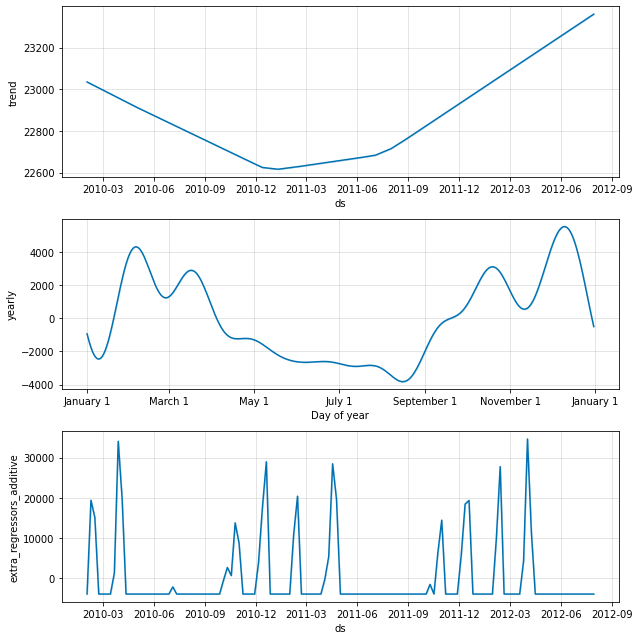

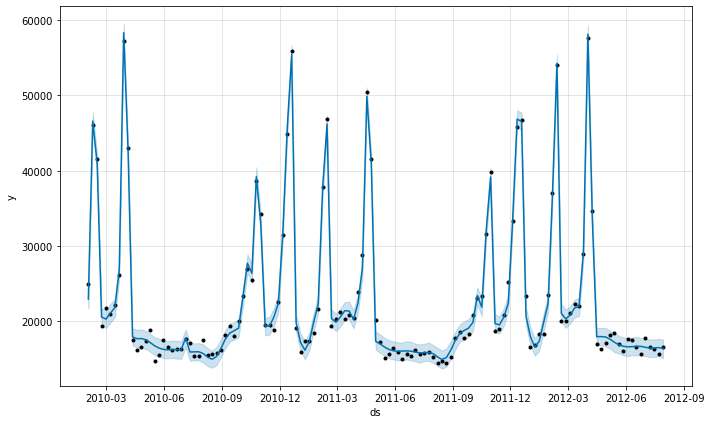

In [13]:
#  拟合历史的数据
df_fit = m.predict( df_train )
# 可视化拟合结果
fig1 = m.plot_components(df_fit)
fig2 = m.plot( df_fit )

In [16]:
df_fit.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,promotion_sales,promotion_sales_lower,promotion_sales_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-02-01,23034.947460,21766.358062,24153.007288,23034.947460,23034.947460,-68.584688,-68.584688,-68.584688,-3974.126067,-3974.126067,-3974.126067,-3974.126067,-3974.126067,-3974.126067,3905.541379,3905.541379,3905.541379,0.0,0.0,0.0,22966.362772
1,2010-02-08,23025.385042,45418.074708,47758.683004,23025.385042,23025.385042,23556.614118,23556.614118,23556.614118,19377.443055,19377.443055,19377.443055,19377.443055,19377.443055,19377.443055,4179.171063,4179.171063,4179.171063,0.0,0.0,0.0,46581.999159
2,2010-02-15,23015.822623,39835.123231,42149.682374,23015.822623,23015.822623,17992.496170,17992.496170,17992.496170,15071.070368,15071.070368,15071.070368,15071.070368,15071.070368,15071.070368,2921.425802,2921.425802,2921.425802,0.0,0.0,0.0,41008.318793
3,2010-02-22,23006.260205,19414.664370,21740.425860,23006.260205,23006.260205,-2418.126113,-2418.126113,-2418.126113,-3974.126067,-3974.126067,-3974.126067,-3974.126067,-3974.126067,-3974.126067,1555.999953,1555.999953,1555.999953,0.0,0.0,0.0,20588.134091
4,2010-03-01,22996.697786,19123.757821,21478.058358,22996.697786,22996.697786,-2684.527260,-2684.527260,-2684.527260,-3974.126067,-3974.126067,-3974.126067,-3974.126067,-3974.126067,-3974.126067,1289.598807,1289.598807,1289.598807,0.0,0.0,0.0,20312.170527


In [14]:
# 预测未来的数据
df_predict = m.predict( df_test )
df_test['yhat'] = df_predict['yhat'].values

## 4.2 使用lightGBM算法做预测

In [18]:
import lightgbm as lgb

预测1号店的1号部门， 以2012-07-30以前的数据做训练，往后预测一周

In [19]:
df_sample = df_all[ (df_all['store']==1) & (df_all['dept']==1)].sort_values('week')

In [20]:
df_sample.head()

,store,dept,week,sales,promotion_sales
0,1,1,2010-02-01,24924.50,0.000000
1,1,1,2010-02-08,46039.49,22538.074165
2,1,1,2010-02-15,41595.55,18381.721909
3,1,1,2010-02-22,19403.54,0.000000
4,1,1,2010-03-01,21827.90,0.000000


In [21]:
# 特征构建
feature_cols = []

## 第一组特征： 历史数据最后一周的销量和促销活动的金额
df_sample['sales_lw'] = df_sample['sales'].shift(1)
df_sample['promotion_lw'] = df_sample['promotion_sales'].shift(1)
feature_cols = feature_cols + ['sales_lw', 'promotion_lw']

## 第二组特征： 上一个周期（即去年同一周）的销量和促销活动金额
df_sample['sales_ly'] = df_sample['sales'].shift(52)
df_sample['promotion_ly'] = df_sample['promotion_sales'].shift(52)
feature_cols = feature_cols + ['sales_ly', 'promotion_ly']

## 第三组特征：待预测周的促销活动金额
feature_cols = feature_cols + ['promotion_sales']

## 只保留所有特征都不为空的数据
for col in feature_cols:
    df_sample = df_sample[ ~df_sample[col].isna() ]

In [22]:
# 构建训练集和验证集
x_train = df_sample[ df_sample['week']<='2012-07-30' ][ feature_cols ].values
y_train = df_sample[ df_sample['week']<='2012-07-30' ][ 'sales' ].values

x_test = df_sample[ df_sample['week']=='2012-08-06' ][ feature_cols ].values
y_test = df_sample[ df_sample['week']=='2012-08-06'  ][ 'sales' ].values

In [24]:
x_train.shape

(79, 5)

In [25]:
# 使用lightGBM建模
from lightgbm.sklearn import LGBMRegressor

model = LGBMRegressor()
model.fit(x_train, y_train)

LGBMRegressor()

In [26]:
# 预测
y_pred = model.predict( x_test )

In [27]:
y_pred, y_test

(array([16165.25781465]), array([16119.92]))